In [1]:
!pip install tensorflow==2.0.0-rc0

     |████████████████████████████████| 86.3MB 26kB/s 
     |████████████████████████████████| 501kB 49.0MB/s 
     |████████████████████████████████| 4.3MB 45.6MB/s 
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, BatchNormalization, Dense, Flatten

In [0]:
from tensorflow.keras.datasets import mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


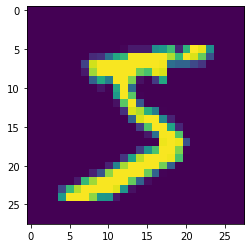

In [7]:
plt.plot()
plt.imshow(X_train[0])

In [8]:
y_train[0]

5

In [0]:
X_train = X_train/np.max(X_train)
X_test = X_test/np.max(X_test)

In [0]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


**CNN Model**

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 21632)             0

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, batch_size=10000, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 207s 3ms/sample - loss: 1.7564 - accuracy: 0.3775
Epoch 2/10
60000/60000 [==============================] - 200s 3ms/sample - loss: 0.8664 - accuracy: 0.7074
Epoch 3/10
60000/60000 [==============================] - 200s 3ms/sample - loss: 0.5856 - accuracy: 0.8104
Epoch 4/10
60000/60000 [==============================] - 200s 3ms/sample - loss: 0.4645 - accuracy: 0.8537
Epoch 5/10
60000/60000 [==============================] - 199s 3ms/sample - loss: 0.3926 - accuracy: 0.8800
Epoch 6/10
60000/60000 [==============================] - 200s 3ms/sample - loss: 0.3429 - accuracy: 0.8952
Epoch 7/10
60000/60000 [==============================] - 200s 3ms/sample - loss: 0.3071 - accuracy: 0.9064
Epoch 8/10
60000/60000 [==============================] - 199s 3ms/sample - loss: 0.2692 - accuracy: 0.9184
Epoch 9/10
60000/60000 [==============================] - 199s 3ms/sample - loss: 0.2399 - accuracy: 0.9275
Epoch

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
y_pred = model.predict_classes(X_test)

In [18]:
print(accuracy_score(y_test, y_pred))

0.9646
